In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 30639, done.
remote: Counting objects: 100% (1095/1095), done.
remote: Compressing objects: 100% (685/685), done.
remote: Total 30639 (delta 703), reused 683 (delta 406), pack-reused 29544
Receiving objects: 100% (30639/30639), 15.82 MiB | 2.53 MiB/s, done.
Resolving deltas: 100% (21989/21989), done.


In [2]:
%cd ultralytics

/home/areebadnankhan/code/work/Atheritia/ultralytics


In [3]:
!git reset --hard abd391b63338b79cebee808b6679498dcc94956f

HEAD is now at abd391b6 `ultralytics 8.2.55` adaptive `tflite_support` logic (#14385)


In [4]:
 #Download patch
!wget https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/05a9086de3825e15ebef3830229273982c3ad9ec/add_head.patch

--2024-07-22 19:31:40--  https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/05a9086de3825e15ebef3830229273982c3ad9ec/add_head.patch
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11258 (11K) [text/plain]
Saving to: ‘add_head.patch’

add_head.patch      100%[===================>]  10.99K  --.-KB/s    in 0s      

2024-07-22 19:31:41 (187 MB/s) - ‘add_head.patch’ saved [11258/11258]



In [5]:
0

In [6]:
from ultralytics import YOLO
import torch
import copy


# Initialize pretrained model
#model = YOLO('yolov8n.pt')

model = YOLO("/home/areebadnankhan/code/work/Atheritia/3_logo_model_yolov8n.pt")

# Keep a copy of old state dict for sanity check
old_dict = copy.deepcopy(model.state_dict())

# We should freeze all but the last layer
model.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [110]:
# for name, module in model.model.named_modules():
#     print(f"Layer: {name}, Module: {module}")


In [7]:
# Add a callback to put the frozen layers in eval mode to prevent BN values
# from changing.
def put_in_eval_mode(trainer, n_layers=22):
  for i, (name, module) in enumerate(trainer.model.named_modules()):
    if name.endswith("bn") and int(name.split('.')[1]) < n_layers:
      module.eval()
      module.track_running_stats = False
      # print(name, " put in eval mode.")

In [8]:
model.add_callback("on_train_epoch_start", put_in_eval_mode)
model.add_callback("on_pretrain_routine_start", put_in_eval_mode)

In [9]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

In [10]:
new_model = YOLO("/home/areebadnankhan/code/work/Atheritia/5_logo_model_yolov8n.pt")

#new_model = YOLO("yolov8n.pt")

new_model.state_dict().items()

odict_items([('model.model.0.conv.weight', tensor([[[[-1.1523e-01, -1.0582e-02,  1.0693e-01],
          [-3.6816e-01,  3.3447e-02,  3.8745e-01],
          [-3.3716e-01, -1.3680e-02,  3.1201e-01]],

         [[-1.4233e-01,  9.7656e-03,  1.5222e-01],
          [-4.8999e-01,  2.7908e-02,  4.6021e-01],
          [-3.7256e-01, -2.7542e-03,  3.4814e-01]],

         [[-4.9866e-02, -1.4900e-02,  2.4887e-02],
          [-2.1375e-01,  3.2898e-02,  1.9385e-01],
          [-1.5344e-01,  3.1113e-02,  1.5649e-01]]],


        [[[ 1.2283e-02,  1.8890e-02,  8.2321e-03],
          [-2.7218e-03, -2.3987e-02,  2.9926e-03],
          [-1.7059e-02, -1.4148e-01, -1.7426e-02]],

         [[-9.5062e-03,  1.2146e-02,  8.6975e-04],
          [-7.3242e-03, -2.6993e-02, -5.9357e-03],
          [-2.0844e-02, -1.4062e-01, -2.2461e-02]],

         [[-1.9436e-03,  4.3182e-03, -3.6392e-03],
          [ 3.4027e-03, -8.4229e-03,  6.2981e-03],
          [ 1.0201e-02, -6.1340e-02,  1.8524e-02]]],


        [[[-1.0460e-02,

In [11]:
# for name, module in new_model.model.named_modules():
#     print(f"Layer: {name}, Module: {module}")


In [12]:
# Compare the dicts. Changes should only be in layer 21 and above
compare_dicts(old_dict, new_model.state_dict())

Weights for parameter 'model.model.18.m.0.cv2.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.1.1.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv3.2.1.bn.running_var' are different.
Weights for parameter 'model.model.9.cv2.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.0.1.bn.running_var' are different.
Weights for parameter 'model.model.2.m.0.cv2.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.1.0.bn.weight' are different.
Weights for parameter 'model.model.3.bn.bias' are different.
Weights for parameter 'model.model.9.cv1.bn.running_var' are different.
Weights for parameter 'model.model.2.cv1.bn.running_var' are different.
Weights for parameter 'model.model.6.cv1.bn.running_mean' are different.
Weights for parameter 'model.model.6.cv2.bn.weight' are different.
Weights for parameter 'model.model.15.cv1.bn.running_var' are different.
Weights for parameter 'model.model.0.bn.running_mean' are differen

In [13]:
new_state_dict = dict()

In [14]:
#  Increment the head number by 1 in the state_dict
for k, v in new_model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v
  # else:
  #   new_state_dict[k] = v

In [15]:
new_state_dict

{'model.model.23.cv2.0.0.conv.weight': tensor([[[[-2.0532e-01, -4.5868e-02, -3.9368e-02],
           [-2.4927e-01,  1.7065e-01,  3.7323e-02],
           [ 2.3083e-01,  3.6816e-01,  4.7302e-02]],
 
          [[-9.0271e-02, -5.3619e-02,  3.2562e-02],
           [-6.0822e-02, -1.9519e-01,  1.7899e-02],
           [ 1.0284e-02, -1.4429e-01,  4.4281e-02]],
 
          [[-1.5344e-01,  2.2363e-01, -8.9478e-02],
           [ 2.3712e-02,  1.7944e-01,  1.1804e-01],
           [ 3.9886e-02,  1.3586e-01,  6.6528e-02]],
 
          ...,
 
          [[-2.7295e-01,  2.8613e-01, -6.4087e-02],
           [-1.2512e-01, -2.1106e-01, -5.1367e-01],
           [-6.9580e-02, -3.4180e-01, -9.1064e-02]],
 
          [[-1.3721e-01, -3.1177e-01, -9.6069e-02],
           [-3.6133e-01,  8.2825e-02,  2.3767e-01],
           [-4.4482e-01,  1.0016e-01,  9.1650e-01]],
 
          [[ 2.9541e-01,  2.7939e-02, -1.5283e-01],
           [ 3.1396e-01, -2.9648e-02,  4.0985e-02],
           [ 3.9502e-01,  1.6638e-01,  2.5806e

In [16]:
new_state_dict['model.model.23.cv2.0.0.conv.weight'].shape


torch.Size([64, 64, 3, 3])

In [18]:
# Save the current state_dict
torch.save(new_state_dict, "yolov8n_lp.pth")

In [19]:
from ultralytics import YOLO
import torch

In [20]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /home/areebadnankhan/code/work/Atheritia/ultralytics


In [27]:
# Edit this to the number of new classes you added
added_classes = 5 # Added 2 new classes.
nc = 3 + added_classes # Total no. of classes

# Update yaml with the number of added_classes
!sed -i "52s/.*/  - \[\[15, 18, 21\], 1, Detect, \[{added_classes}\]\]/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml
!sed -i "5s/.*/nc: {nc}/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml

In [28]:
#model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('yolov8n.pt')

model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('/home/areebadnankhan/code/work/Atheritia/3_logo_model_yolov8n.pt')

Transferred 355/440 items from pretrained weights


In [29]:
model_2

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [30]:
state_dict = torch.load("yolov8n_lp.pth")

# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [32]:
%cd ..

/home/areebadnankhan/code/work/Atheritia


In [39]:
# Output of COCO model
model_coco = YOLO("yolov8n.pt")

# For consistency
model_coco.model.names = {k:k for k in model_coco.names.keys()}

result_coco = model_coco.predict("images/images9.jpg")[0]


image 1/1 /home/areebadnankhan/code/work/Atheritia/images/images9.jpg: 384x640 1 2, 1 7, 76.6ms
Speed: 2.0ms preprocess, 76.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [40]:
# Output of custom LP model
model_lp = YOLO("/home/areebadnankhan/code/work/Atheritia/3_logo_model_yolov8n.pt")

# For plotting consistency, change all class names to class numbers
model_lp.model.names = {k:k for k in model_lp.names.keys()}

result_lp = model_lp.predict("images/images9.jpg")[0]


image 1/1 /home/areebadnankhan/code/work/Atheritia/images/images9.jpg: 384x640 (no detections), 69.4ms
Speed: 1.7ms preprocess, 69.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


In [41]:
# Output of the new model
result_merged = model_2.predict("images/images9.jpg")[0]


image 1/1 /home/areebadnankhan/code/work/Atheritia/images/images9.jpg: 384x640 (no detections), 88.7ms
Speed: 1.7ms preprocess, 88.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

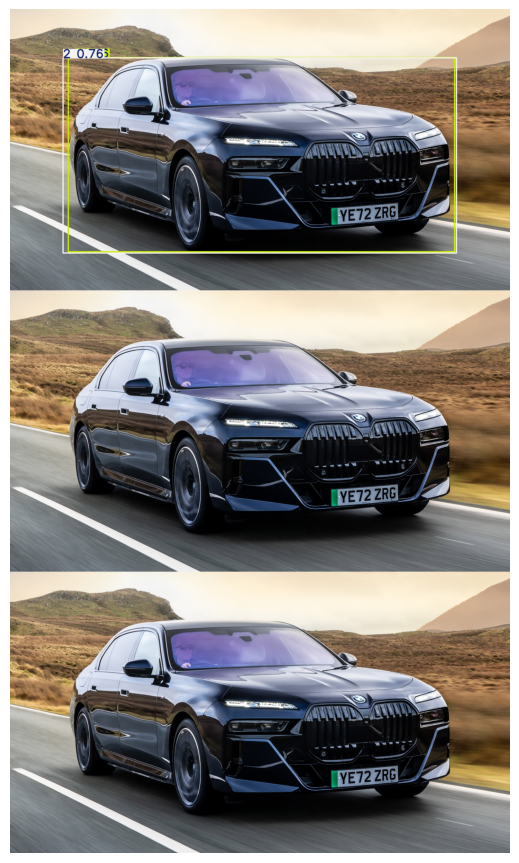

In [44]:
show_output([result_coco.plot(), result_lp.plot(), result_merged.plot()])